<font size="9">SchedTune on JUNO</font><br>
<hr>

In [1]:
import logging
from conf import LisaLogging
LisaLogging.setup()

In [2]:
# Generate plots inline
%matplotlib inline

import json
import os

# Support for trace events analysis
from trace import Trace

# Support for performance analysis of RTApp workloads
from perf_analysis import PerfAnalysis

# Suport for FTrace events parsing and visualization
import trappy

# Test setup

In [3]:
# Base folder where tests folder are located
res_dir = '../../results_ipynb/stune_juno_rampL/'
logging.info('Content of the output folder %s', res_dir)
!tree {res_dir}

02:07:32  INFO    : Content of the output folder ../../results_ipynb/stune_juno_rampL/


../../results_ipynb/stune_juno_rampL/
├── rtapp:boost15:mixprof
│   ├── 1
│   │   ├── cluster_freqs.png
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   ├── task_perf_task_r5_10-60.png
│   │   ├── task_util_task_r5_10-60.png
│   │   ├── trace.dat
│   │   ├── trace.raw.txt
│   │   └── trace.txt
│   └── platform.json
├── rtapp:boost30:mixprof
│   ├── 1
│   │   ├── cluster_freqs.png
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   ├── task_perf_task_r5_10-60.png
│   │   ├── task_util_task_r5_10-60.png
│   │   ├── trace.dat
│   │   ├── trace.raw.txt
│   │   └── trace.txt
│   └── platform.json
├── rtapp:boost60:mixprof
│   ├── 1
│   │   ├── cluster_freqs.png
│   │   ├── energy.json
│   │   ├── mixprof_00.json
│   │   ├── output.log
│   │   ├── rt-app-task_r5_10-60-0.log
│   │   ├── task_perf_task_r5_10-60.png
│   │   ├── task_util_task_r5_10-60.pn

In [4]:
with open(os.path.join(res_dir, 'rtapp:noboost:mixprof', 'platform.json'), 'r') as fh:
    platform = json.load(fh)
#print json.dumps(platform, indent=4)
logging.info('LITTLE cluster max capacity: %d',
             platform['nrg_model']['little']['cpu']['cap_max'])

02:07:32  INFO    : LITTLE cluster max capacity: 447


# Configuration

In [5]:
# Full analysis function
def analysis(test_id, t_min=None, t_max=None):
    
    test_dir = '{}/rtapp:{}:mixprof'.format(res_dir, test_id)
    run_dir = '{}/1/'.format(test_dir)
    platform_json = '{}/platform.json'.format(test_dir)
    trace_file = '{}/trace.dat'.format(run_dir)
    
    # Load platform description data
    with open(platform_json, 'r') as fh:
        platform = json.load(fh)

    # Load RTApp Performance data
    pa = PerfAnalysis(run_dir)
    logging.info("Loaded performance data for tasks: %s", pa.tasks())
    
    # Load Trace data
    events = [
        "sched_switch",
        "sched_contrib_scale_f",
        "sched_load_avg_cpu",
        "sched_load_avg_task",
        "sched_tune_tasks_update",
        "sched_boost_cpu",
        "sched_boost_task",
        "sched_energy_diff",
        "cpu_frequency",
        "cpu_capacity"
    ]
    trace = Trace(run_dir, events, platform)
    
    # Define time ranges for all the temporal plots
    trace.setXTimeRange(t_min, t_max)
    
    # Tasks plots
    trace.analysis.tasks.plotTasks(pa.tasks())
    for task in pa.tasks():
        pa.plotPerf(task)

    # Cluster and CPUs plots
    trace.analysis.frequency.plotClusterFrequencies()


# Results

## No Boosting

02:07:32  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
02:07:33  INFO    :   task    task_r5_10-60 found, pid: [1444]
02:07:33  INFO    : Collected events spans a 15.820 [s] time interval
02:07:33  INFO    : Set plots time range to (0.000000, 15.819545)[s]
02:07:33  INFO    : Set plots time range to (0.000000, 15.819545)[s]
02:07:33  INFO    :   task    task_r5_10-60 found, pid: [1444]
02:07:34  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.63, std: 0.17
02:07:34  INFO    : LITTLE cluster average frequency: 0.502 GHz
02:07:34  INFO    : big    cluster average frequency: 0.450 GHz


Maximum estimated system energy: 1725


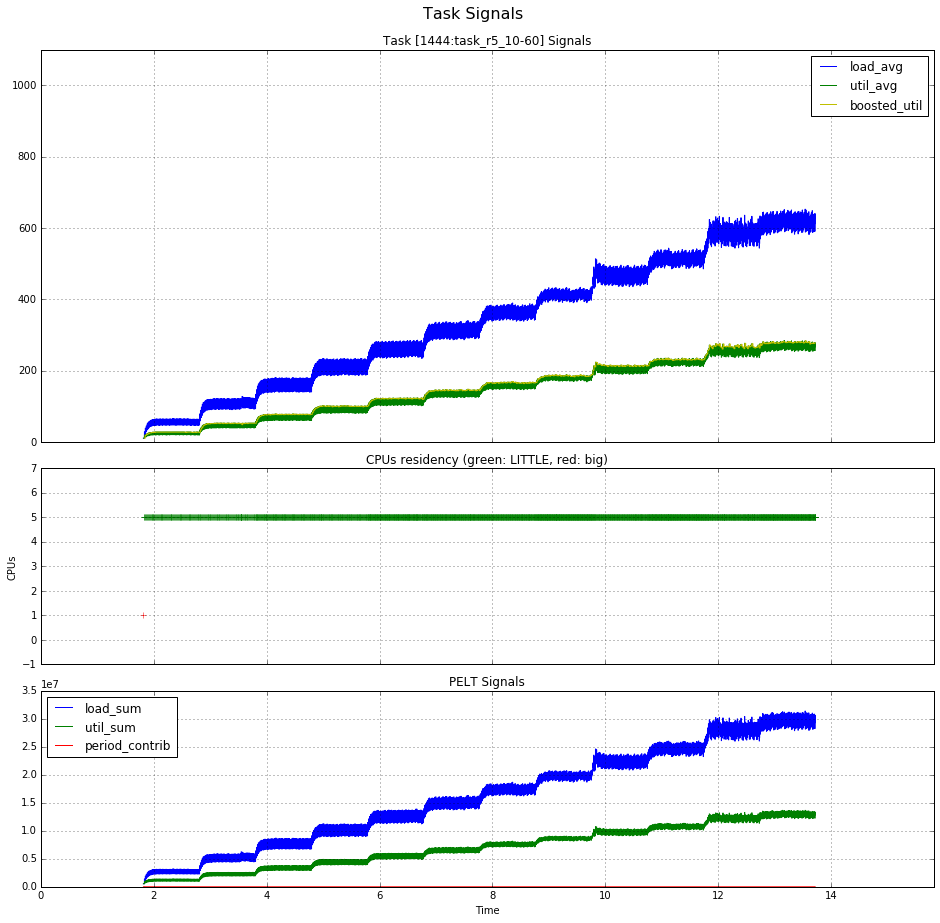

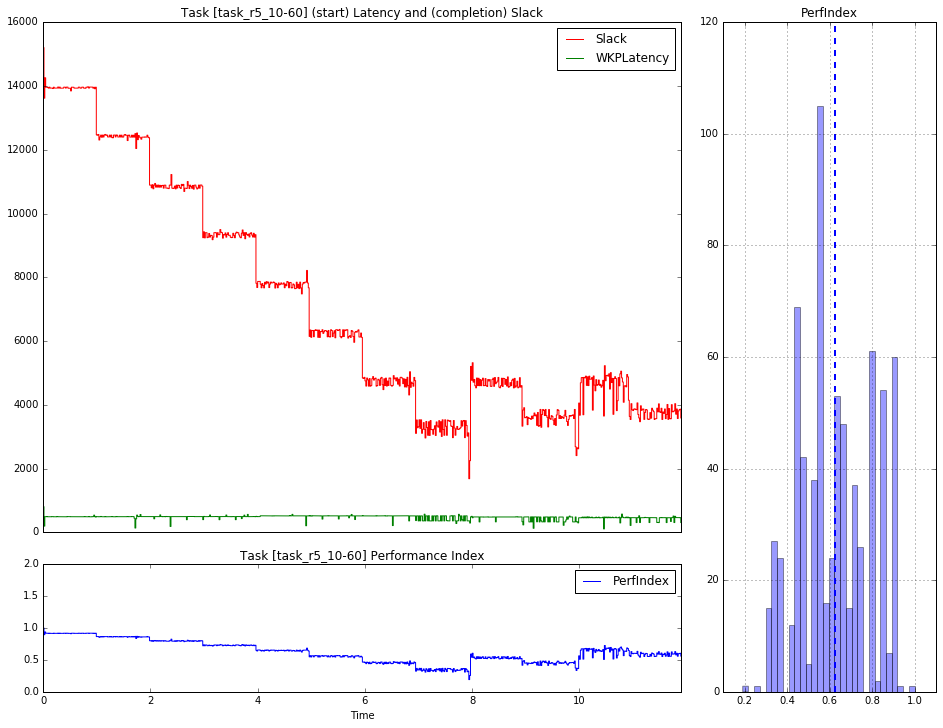

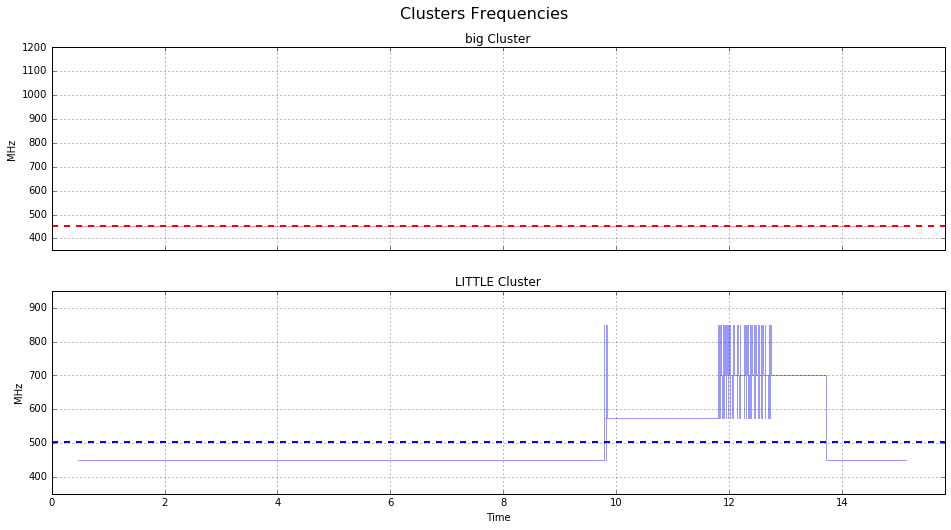

In [6]:
analysis('noboost')

## Boost 15%

02:07:35  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
02:07:36  INFO    :   task    task_r5_10-60 found, pid: [1499]
02:07:36  INFO    : Collected events spans a 15.779 [s] time interval
02:07:36  INFO    : Set plots time range to (0.000000, 15.778985)[s]
02:07:36  INFO    : Set plots time range to (0.000000, 15.778985)[s]
02:07:36  INFO    :   task    task_r5_10-60 found, pid: [1499]
02:07:37  INFO    : PerfIndex, Task [task_r5_10-60] avg: 0.97, std: 0.23
02:07:37  INFO    : LITTLE cluster average frequency: 0.598 GHz
02:07:37  INFO    : big    cluster average frequency: 0.502 GHz


Maximum estimated system energy: 1725


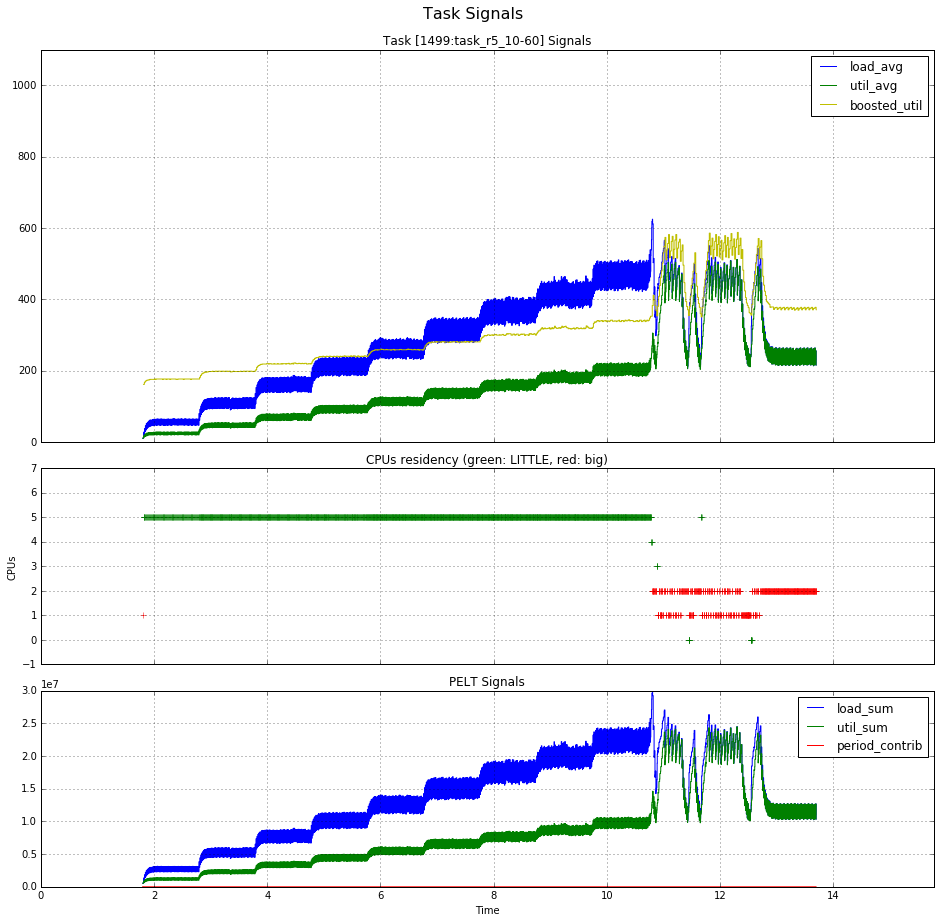

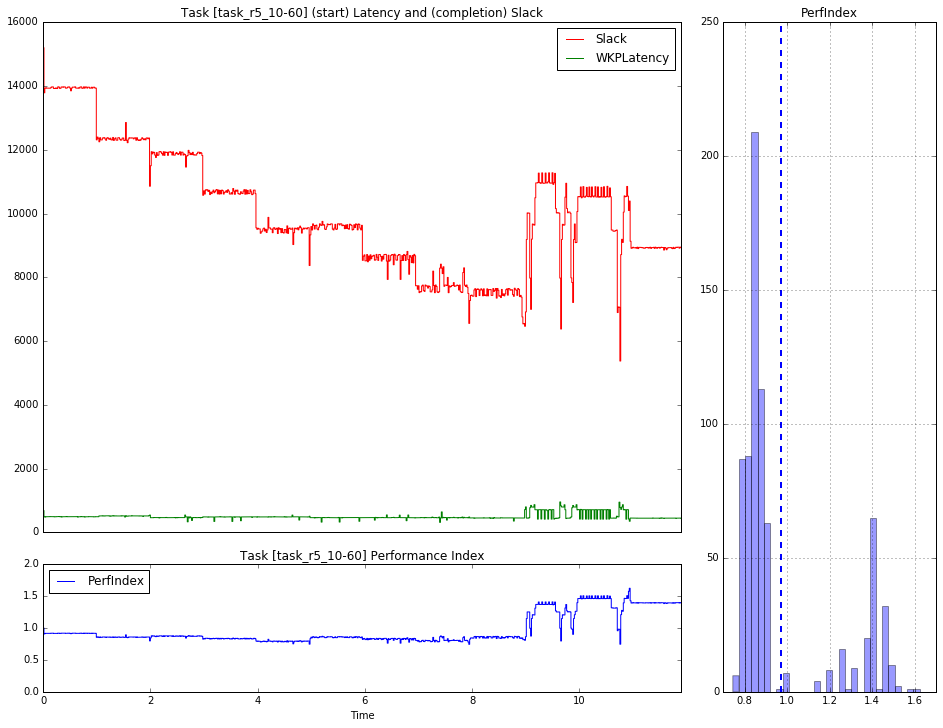

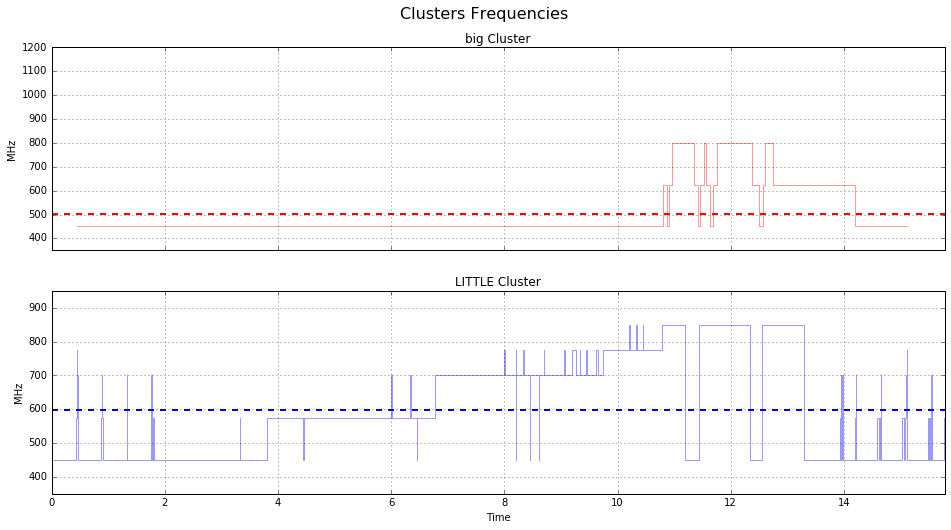

In [7]:
analysis('boost15')

## Boost 30%

02:07:38  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
02:07:39  INFO    :   task    task_r5_10-60 found, pid: [1554]
02:07:39  INFO    : Collected events spans a 15.669 [s] time interval
02:07:39  INFO    : Set plots time range to (0.000000, 15.668659)[s]
02:07:39  INFO    : Set plots time range to (0.000000, 15.668659)[s]
02:07:39  INFO    :   task    task_r5_10-60 found, pid: [1554]
02:07:39  INFO    : PerfIndex, Task [task_r5_10-60] avg: 1.13, std: 0.13
02:07:40  INFO    : LITTLE cluster average frequency: 0.788 GHz
02:07:40  INFO    : big    cluster average frequency: 0.574 GHz


Maximum estimated system energy: 1725


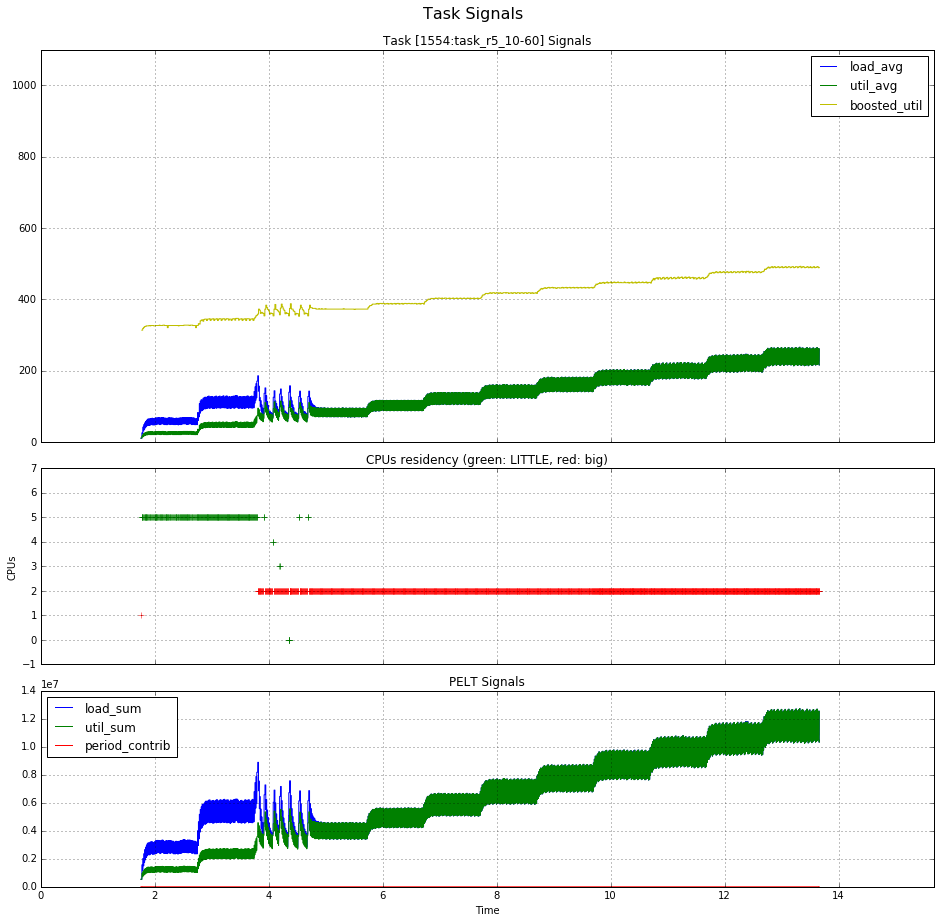

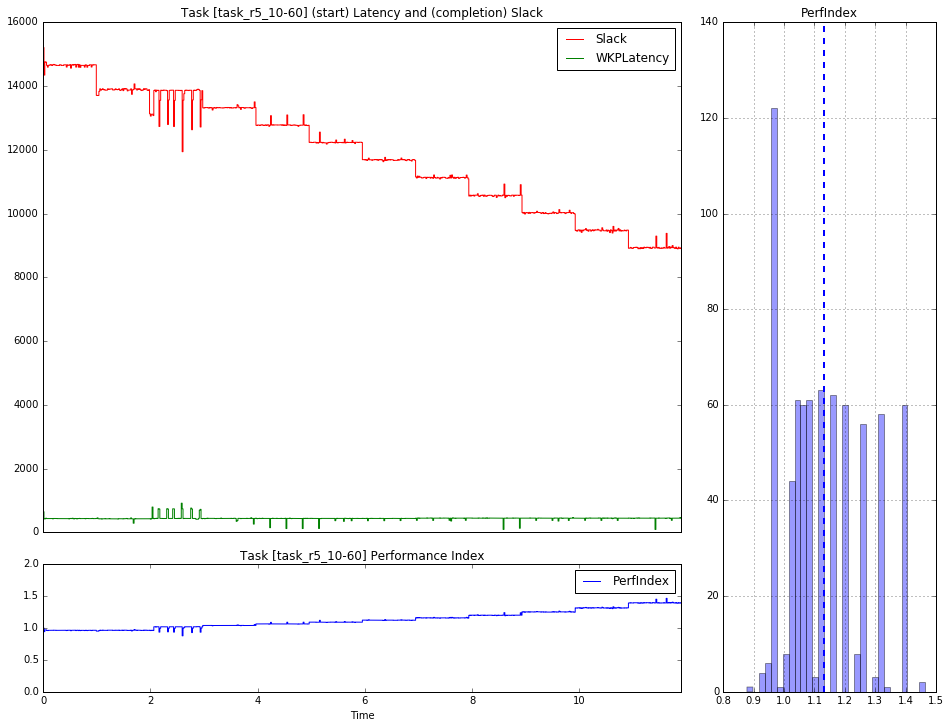

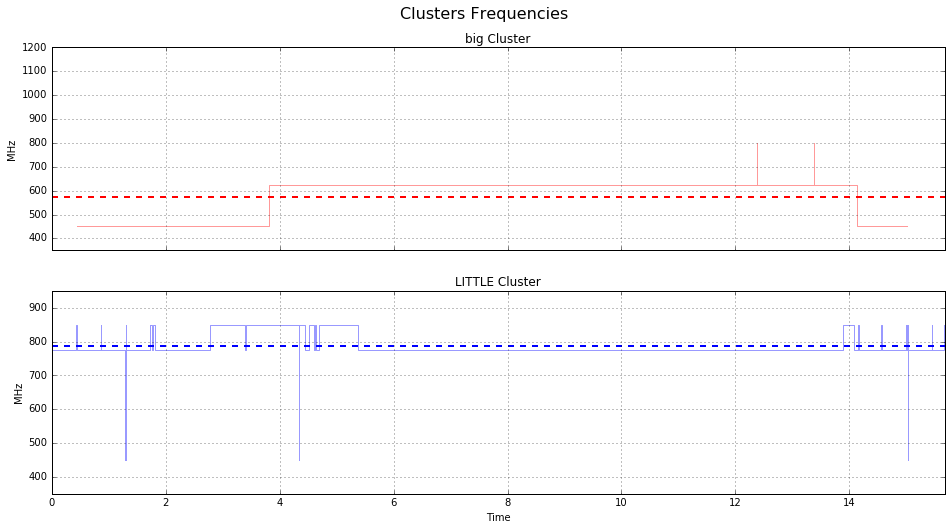

In [8]:
analysis('boost30')

## Boost 60%

02:07:41  INFO    : Loaded performance data for tasks: ['task_r5_10-60']
02:07:41  INFO    :   task    task_r5_10-60 found, pid: [1609]
02:07:41  INFO    : Collected events spans a 15.622 [s] time interval
02:07:41  INFO    : Set plots time range to (0.000000, 15.621621)[s]
02:07:41  INFO    : Set plots time range to (0.000000, 15.621621)[s]
02:07:41  INFO    :   task    task_r5_10-60 found, pid: [1609]
02:07:42  INFO    : PerfIndex, Task [task_r5_10-60] avg: 1.28, std: 0.23
02:07:42  INFO    : LITTLE cluster average frequency: 0.850 GHz
02:07:42  INFO    : big    cluster average frequency: 0.948 GHz


Maximum estimated system energy: 1725


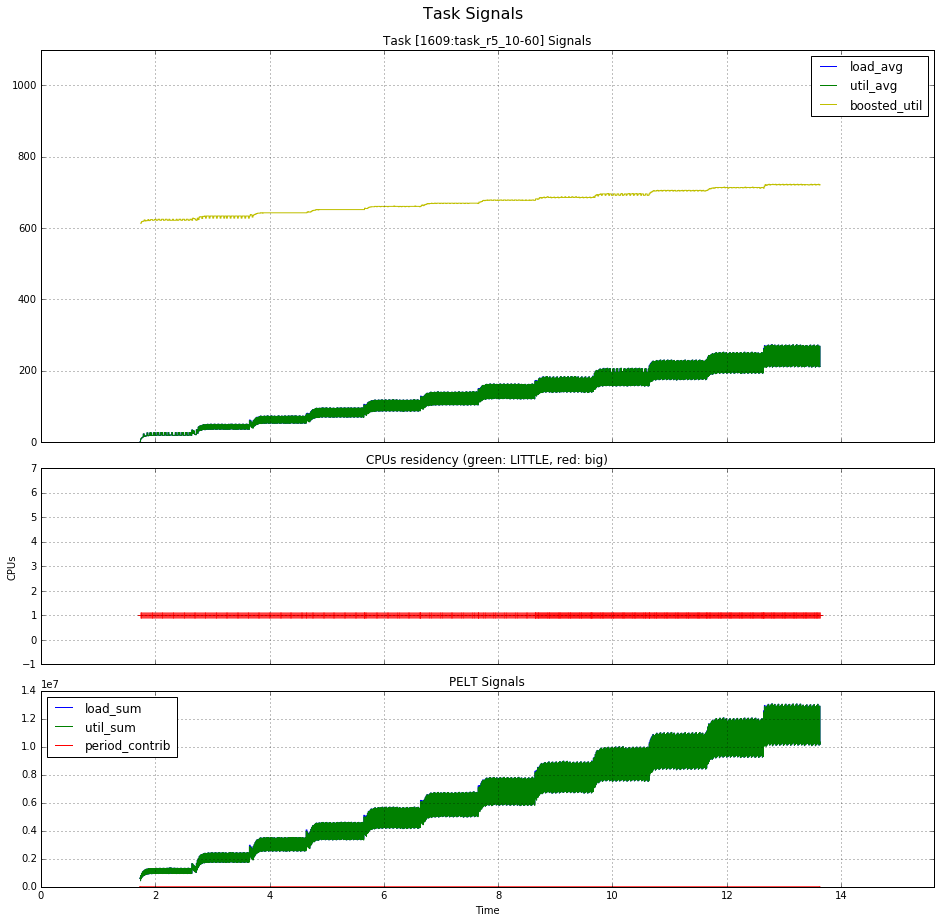

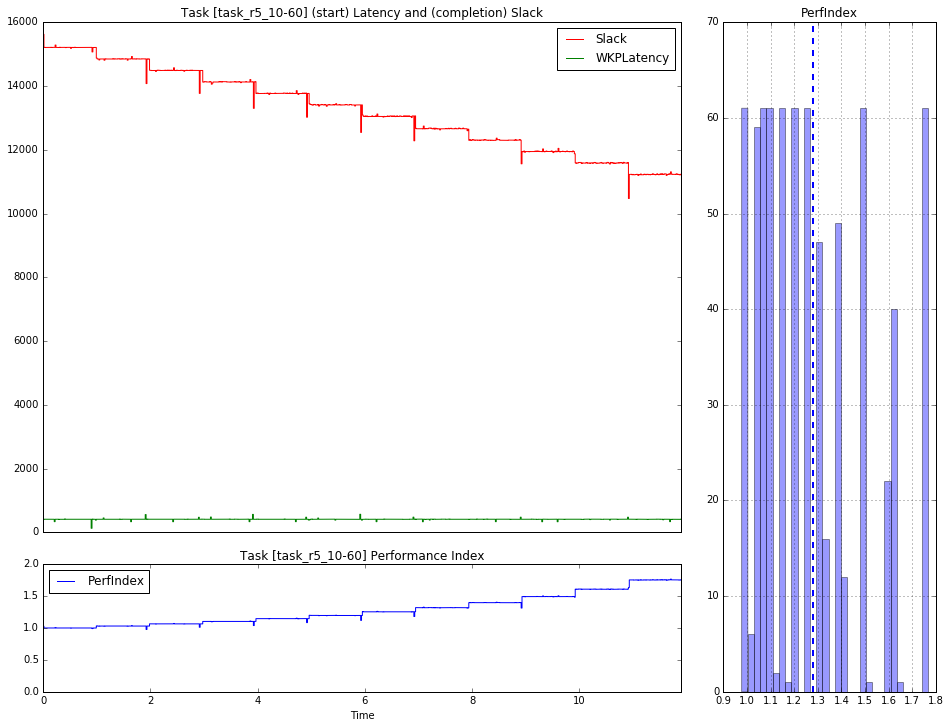

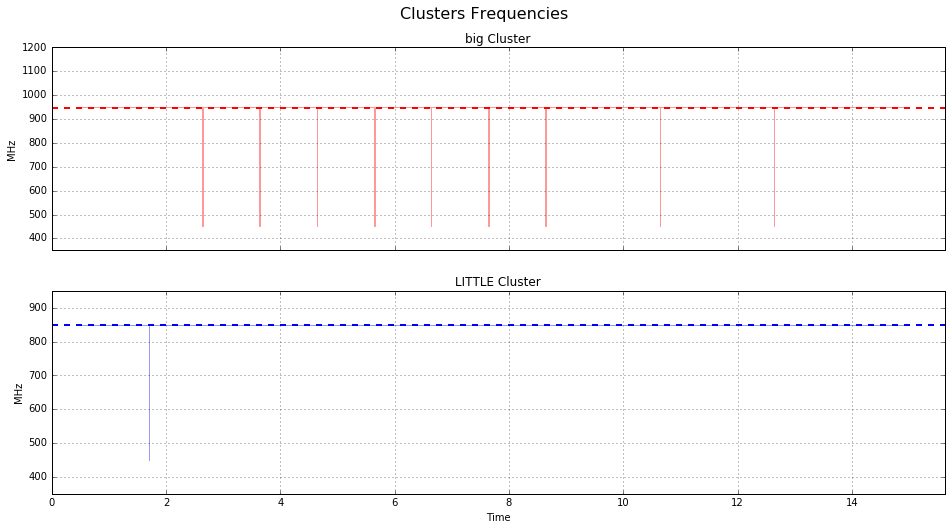

In [9]:
analysis('boost60')